In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/home/laserhammer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from armed_bandit import Bandit


100%|██████████| 500/500 [00:01<00:00, 306.62it/s]


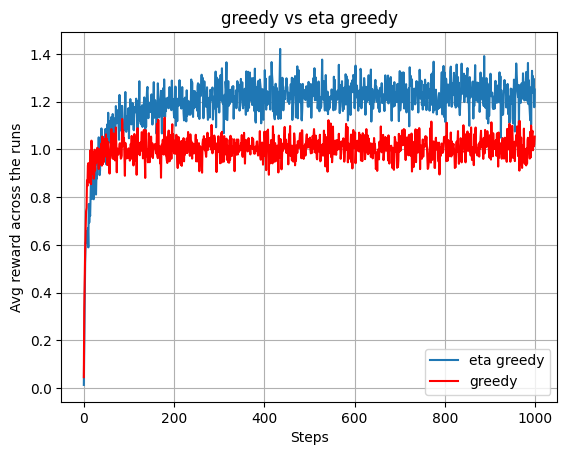

In [3]:
runs  = 500
steps = 1000

red = np.zeros(steps)
greefy_red = np.zeros(steps)



for _ in tqdm(range(runs)):
    ban = Bandit(10, 0.2)  # eta-greedy 
    ban_exp = Bandit(10, 0)  # greedy (no exploration)
    red += np.array(ban.Run(steps))
    greefy_red += np.array(ban_exp.Run(steps))
red /= runs
greefy_red /= runs

plt.plot(range(steps), red, label="eta greedy")
plt.plot(range(steps), greefy_red, color='red', label="greedy")
plt.title("greedy vs eta greedy")
plt.xlabel('Steps')
plt.ylabel('Avg reward across the runs')
plt.legend()
plt.grid(True)
plt.show()


# different eta values(from greedy to explore)

100%|██████████| 500/500 [00:00<00:00, 626.84it/s]


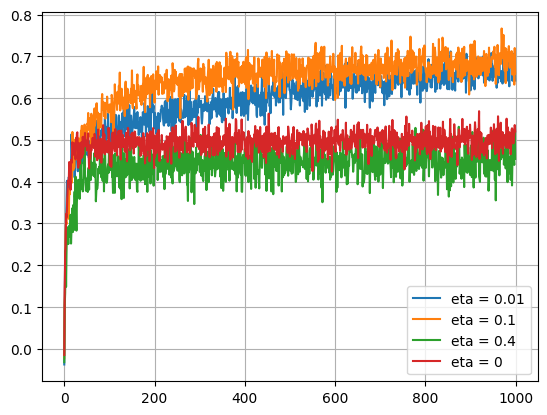

In [4]:
for i in [0.01,0.1,0.4,0]:
    ban = Bandit(10,i)
    avg_red = np.zeros(steps)
    badit_count = []
    for j in tqdm(range(runs)):
        avg_red +=ban.Run(steps)
        badit_count.append(steps)
    avg_red = avg_red/1000
    plt.plot(range(steps),avg_red,label = f"eta = {i}")
plt.legend()
plt.grid(True)